# Perceptron

In [1]:
import matplotlib.pyplot as plt
import random
import torch
import torch.nn as nn
import numpy as np
import math

The **perceptron** is the building block of artificial neural networks. The concept of a perceptron is based off of the neuron. A perceptron analogous to a neuron as an artificial neural network is analogous to a biological neural network of a living organism.

The architecture of a perceptron consists of three main components: a set of **weights**, a **bias**, and an **activation function**. Input data is fed into the perceptron, the **weighted sum** is calculated using the input data and the weights and bias values, then, that sum is fed into the activation function which transforms the sum, and then that value is output as the final result.

The weights of a perceptron are usually represented with a vector:

$$w = \begin{bmatrix} w_1 & w_2 & w_3 & \ldots & w_d \end{bmatrix}$$

where $w_1, \ldots, w_d$ are numeric weight values. $d$ is the number of dimensions of an input value (the number of features of the input values). Bias is a scalar value represented with the letter $b$ or sometimes $w_0$. If I wanted to, I could include the bias $w_0$ as its own "weight" in the weight vector instead of denoting it as a separate variable $b$.

Each input data point $x_i$ with $d$ number of features can also be represented as a vector:

$$x_i = \begin{bmatrix} x_{i,1} & x_{i,2} & x_{i,3} & \ldots & x_{i,d} \end{bmatrix}$$

I can also include $1$ as $x_{i,0}$ if the bias value is included in the weight vector. The weighted sum is calculated by taking the dot product of the weight and input vectors.

The activation function of a perceptron is any one-variable function that transforms the output of the weighted sum into an new output.

When tasked with creating a good model for a particular regression/classification problem, a collection of interconnected perceptrons (a neural network) is often used. A perceptron/neural network "learns" to model a dataset by finding the weight and bias values that best fit the dataset. The ideal weight and bias values can be found by processing the same data points in the dataset over and over again while trying different combinations of weight and bias values. The performance of a model is usually measured with a **loss function**. A loss function calculates the difference between the current output of a model and the expected output. If the learning/training steps are implemented correctly, I would expect the loss to decrease with over several epochs until it converges onto a value. A loss function also helps me adjust the weight and bias values appropriately so I do not have to guess and try random weight and bias combinations and just hope I stumble across the best values to model the data.

## Linear Regression (Least Squares)

Say I have a collection of $(x,y)$ data points and I want to find the line that best fits the data. For a more concrete example, let me use the same dataset used in the linear regression IPython notebook:

$$D = [(-1.5, 4),(-0.1, 4),(0.6, 3.1),(2.3, 0.3),(-1.2, 2.4),(1.6, 0.4),(1.7, 1.2),(-0.2, 2.4),(0.7, 2.3),(0.5, 1.75)]$$

Scatter plot of the dataset $D$:

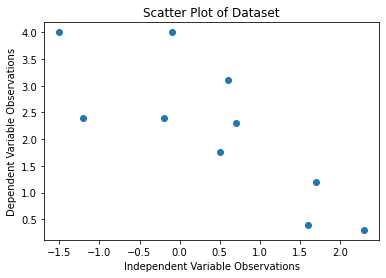

In [2]:
dataset = [(-1.5, 4),(-0.1, 4),(0.6, 3.1),(2.3, 0.3),(-1.2, 2.4),(1.6, 0.4),(1.7, 1.2),(-0.2, 2.4),(0.7, 2.3),(0.5, 1.75)]

plt.title("Scatter Plot of Dataset")
plt.xlabel("Independent Variable Observations")
plt.ylabel("Dependent Variable Observations")
plt.scatter(x=[p[0] for p in dataset], y=[p[1] for p in dataset])
plt.show()

I can use a perceptron to solve the least squares linear regression problem. In fact, the way the architecture of the perceptron is definied makes it really easy to use the stochastic gradient descent method to solve the least squares problem.

If I define the activiation function as the identity function $f(x)=x$, the loss function as the square of the difference between the true value $y_i$ and the predicted value $\hat y_i$, what I have is basically everything needed to perform least squares stochastic gradient descent, just in perceptron form.

Recalling the formulas from my section on linear least squares stochastic gradient descent:

$$
MSE = \frac{1}{n} \sum\limits_{i = 1}^{n} (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)^2
$$
$$
\nabla MSE =
\begin{bmatrix}
    MSE_{\hat{\beta}_0} \\
    MSE_{\hat{\beta}_1}
\end{bmatrix}
=
\begin{bmatrix}
    \frac{1}{n} \sum\limits_{i = 1}^{n} -2(y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
    \frac{1}{n} \sum\limits_{i = 1}^{n} -2x_i(y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)
\end{bmatrix}
$$

$$
\begin{bmatrix}
    {\hat{\beta}_0}_{n+1} \\
    {\hat{\beta}_1}_{n+1}
\end{bmatrix}
=
\begin{bmatrix}
    {\hat{\beta}_0}_n \\
    {\hat{\beta}_1}_n
\end{bmatrix}
- \eta
\nabla MSE ({\hat{\beta}_0}_n, {\hat{\beta}_1}_n)
$$

I want to rewrite and rearrange these formulas a bit so that it is a little bit more clear how these formulas fit into the perceptron model.

The perceptron typically separates the bias component and the weight components. Above, I have the bias and weight(s) in one gradient vector, so let me rewrite them separately:

$$
b_{n+1} = b_n - \eta MSE_{b}(b_n, w_{1\, n}) = b_n - \eta\left(\frac{1}{m} \sum\limits_{i = 1}^{m} -2(y_i - b_n - w_{1\, n} x_{i,1})\right) \\
w_{1\, n+1} = w_{1\, n} - \eta MSE_{w_1}(b_n, w_{1\, n}) = w_{1\, n} - \eta\left(\frac{1}{m} \sum\limits_{i = 1}^{m} -2x_{i,1}(y_i - b_n - w_{1\, n} x_{i,1})\right)
$$

Note that I have replaced $\hat{\beta}_0$ with $b$ and $\hat{\beta}_1$ with $w_1$ so that the variables fit the context of the perceptron. Also a small replacement of $n$ with $m$ is used two avoid confusion with what would otherwise be two different values represented by the same variable $n$.

I can still make some more simplifications. Perceptrons generally process one data point at a time, so I can set $m=1$. Also, $b_n + w_{1\, n} x_{i,1}$ is the same as prediction value $\hat y_i$. So rewriting and rearranging, I have:

$$
b_{n+1} = b_n + 2\eta (y_i - \hat y_i) \\
w_{1\, n+1} = w_{1\, n} + 2\eta (y_i - \hat y_i)x_{i,1}
$$

Since $\eta$ is some small constant value, I can pretend that the $2$ is "absorbed" by $\eta$ since I can set $\eta$ to whatever value I want anyways. Now I have:

$$
b_{n+1} = b_n + \eta (y_i - \hat y_i) \\
w_{1\, n+1} = w_{1\, n} + \eta (y_i - \hat y_i)x_{i,1}
$$

as formulas for updating the weights (weight in this case) and bias.

Now I have everything needed to code out a perceptron. The perceptron algorithm in words is as follows:
1. Initialize the weights and bias to zero (or with random values, it doesn't really matter)
2. Set the number of epochs
3. Iterate through each epoch
    1. For each epoch, randomly shuffle the order of data points in the dataset
    2. Iterate through each point in the dataset
        1. For each point, feed the $x_i$ value into the perceptron
        2. Update the weights and the bias based on the values calculated from the gradient of the loss function

After enough epochs, the weights and bias values should converge onto some stable values.

In [3]:
lr = 0.001

class Perceptron():
    def __init__(self, input_dataset):
        self.dataset = input_dataset.copy()
        self.num_features = len(input_dataset[0]) - 1
        self.weights = [0] * self.num_features
        self.bias = 0
        self.activation_func = lambda x: x
    
    def shuffle_dataset(self):
        random.shuffle(self.dataset)
    
    def process_one_point(self, data_point):
        x = data_point[0:self.num_features]
        y = data_point[len(data_point) - 1]
        weighted_sum = sum([w_d * x_d for w_d, x_d in zip(self.weights, x)]) + self.bias
        return x, y, self.activation_func(weighted_sum)
    
    def update_weights_bias(self, lr, x, y, y_hat):
        self.weights = [w_d + lr * (y - y_hat) * x_d for w_d, x_d in zip(self.weights, x)]
        self.bias += lr * (y - y_hat)
    
    def process_dataset(self, lr):
        self.shuffle_dataset()
        for data_point in self.dataset:
            x, y, y_hat = self.process_one_point(data_point)
            self.update_weights_bias(lr, x, y, y_hat)

Now that the structure of the perceptron is coded, I can train the perceptron to find a model for the dataset and then graph the result.

In [4]:
p = Perceptron(dataset)
for epoch in range(0, 100000):
    p.process_dataset(lr)

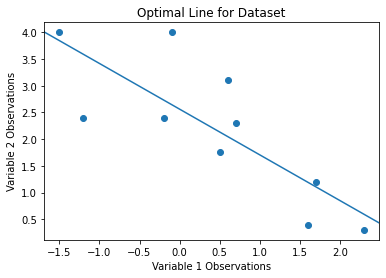

Weight Vector: [-0.8546742291537157]
Bias: 2.560876320399005
Residual Sum of Squares: 5.467462560012633


In [5]:
plt.title("Optimal Line for Dataset")
plt.xlabel("Variable 1 Observations")
plt.ylabel("Variable 2 Observations")
plt.scatter(x=[p[0] for p in dataset], y=[p[1] for p in dataset])
plt.axline(
    (dataset[0][0], p.weights[0] * dataset[0][0] + p.bias),
    (dataset[1][0], p.weights[0] * dataset[1][0] + p.bias)
)
plt.show()

print("Weight Vector:", p.weights)
print("Bias:", p.bias)
print("Residual Sum of Squares:", sum([(y_i - p.bias - p.weights[0] * x_i)**2 for x_i, y_i in dataset]))

### PyTorch Implementation

I can implement a perceptron using PyTorch. I try to structure the PyTorch model such that it is similar to the way I coded the perceptron from scratch above. This is just so I can attempt to understand a bit about what PyTorch is doing.

In [6]:
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        #define a linear layer with # of features as input (one in this case) and one output (and with a bias value)
        self.ws = nn.Linear(1, 1, bias=True)
        #define a linear layer for the activation function
        self.af = nn.Identity()
    
    def forward(self, x):
        ws_output = self.ws(x) #feed input data into the linear layer and store the weighted sum as a variable
        af_out = self.af(ws_output) #send the weighted sum through an activation function
        return af_out #return final output

p = Perceptron()

#prepare dataset
xs, ys = torch.split(torch.tensor(dataset), 1, dim=1)

#define measure of loss and how weights should be updated
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(p.parameters(), lr=0.001)

#train dataset
for epoch in range(0, 10000):
    for i in range(0, len(dataset)):
        #plug in input and get predicted output
        y_hat = p(xs[i])
        
        #calculate the loss (the measure between expected output and predicted output)
        loss = criterion(ys[i], y_hat)

        #backpropagation step
        optimizer.zero_grad() #sets the gradients of all optimized torch.Tensors to zero
        loss.backward() #calculate the gradient of the loss function
        optimizer.step() #update the weights and bias

print("Weight:", p.ws.weight.item())
print("Bias:", p.ws.bias.item())

Weight: -0.8551109433174133
Bias: 2.559089422225952


Though the code above helps me relate elements to the perceptron I coded from scratch, there are a couple of simplifications I should make to the PyTorch code. I can eliminate the identity linear layer as it doesn't transform my weighted sum at all. The PyTorch is also smart enough to process the whole input dataset at once - I don't need an inner for loop to feed the model every individual point.

In [7]:
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.ws = nn.Linear(1, 1, bias=True)
    
    def forward(self, x):
        return self.ws(x)

p = Perceptron()

xs, ys = torch.split(torch.tensor(dataset), 1, dim=1)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(p.parameters(), lr=0.001)

for epoch in range(0, 100000):
    y_hat = p(xs)

    loss = criterion(ys, y_hat)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Now I can graph the line that the PyTorch perceptron came up with:

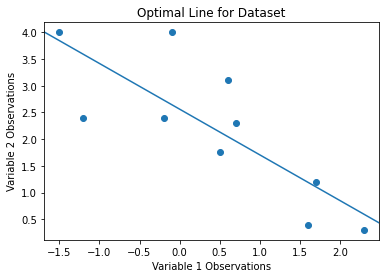

Weight: -0.8544847369194031
Bias: 2.5609138011932373
Residual Sum of Squares: 5.467461935727148


In [8]:
plt.title("Optimal Line for Dataset")
plt.xlabel("Variable 1 Observations")
plt.ylabel("Variable 2 Observations")
plt.scatter(x=[p[0] for p in dataset], y=[p[1] for p in dataset])
plt.axline(
    (dataset[0][0], p.ws.weight.item() * dataset[0][0] + p.ws.bias.item()),
    (dataset[1][0], p.ws.weight.item() * dataset[1][0] + p.ws.bias.item())
)
plt.show()

print("Weight:", p.ws.weight.item())
print("Bias:", p.ws.bias.item())
print("Residual Sum of Squares:", sum([(y_i - p.ws.bias.item() - p.ws.weight.item() * x_i)**2 for x_i, y_i in dataset]))

## Binary Classification

Consider this problem: I have a collection of data points that can be graphed on a two-dimensional Cartesian coordinate plane. Each point has two feature values: an $x_1$ value and an $x_2$ value, and a classfication label. There are only two labels, meaning points fall into one class or the other. This type of problem I'm presenting is known as a **binary classification** problem. I also assume here that the data here is **lineary seperable**, meaning the two classfications of observed and unobserved data points can be divided cleanly and completely with a straight line. The goal is to find the equation for a line that does just this. A perceptron can be used to solve this problem.

Assume I have already collected a small sample of data points. The data is graphed below:

In [9]:
X1_LOWER_BOUND = -10
X1_UPPER_BOUND = 10
NUM_SAMPLES = 10
TRUE_BOUNDARY_FUNCTION = lambda x1: 1.5 * x1 + 0.5 #same as 3x1 - 2x2 + 1 = 0
X2_LOWER_BOUND = min(TRUE_BOUNDARY_FUNCTION(X1_LOWER_BOUND), TRUE_BOUNDARY_FUNCTION(X1_UPPER_BOUND))
X2_UPPER_BOUND = max(TRUE_BOUNDARY_FUNCTION(X1_LOWER_BOUND), TRUE_BOUNDARY_FUNCTION(X1_UPPER_BOUND))

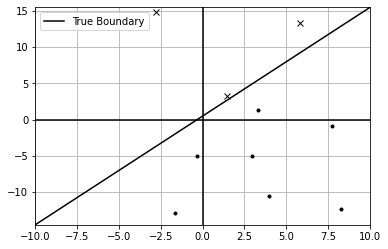

In [10]:
#generate samples
samples = [
    (random.uniform(X1_LOWER_BOUND, X1_UPPER_BOUND), random.uniform(X2_LOWER_BOUND, X2_UPPER_BOUND))
    for i in range(0, NUM_SAMPLES)
]
true_classifications = [1 if samples[i][1] > TRUE_BOUNDARY_FUNCTION(samples[i][0]) else 0 for i in range(0, NUM_SAMPLES)]

#graph samples
plt.grid()
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlim([X1_LOWER_BOUND, X1_UPPER_BOUND])
plt.ylim([X2_LOWER_BOUND, X2_UPPER_BOUND])
plt.axline(
    (X1_LOWER_BOUND, TRUE_BOUNDARY_FUNCTION(X1_LOWER_BOUND)),
    (X1_UPPER_BOUND, TRUE_BOUNDARY_FUNCTION(X1_UPPER_BOUND)),
    color='black',
    label='True Boundary'
)
for i in range(0, NUM_SAMPLES):
    plt.plot(samples[i][0], samples[i][1], color="black", marker="." if true_classifications[i] == 0 else "x")
plt.legend()
plt.show()

The black line represents the "true" boundary - the (typically unknown) line/hyperplane that divides the space into two distinct regions/classes. As I can see from the graph above, points on one side of the line are marked with x's and points on the other side of the line are marked with dots. This boundary is typically written in the form of $\beta_0 + \beta_1x_1 + \beta_2x_2 = 0$ where $\beta_i$ values are the true values of the boundary line and $x_i$ values are the inputs for the feature values. In the code above, I rearranged the equation to express the value of $x_2$ in terms of $x_1$. I also technically defined the boundary such that points that satisfy $\beta_0 + \beta_1x_1 + \beta_2x_2 > 0$ are x's and $\beta_0 + \beta_1x_1 + \beta_2x_2 \leq 0$ are dots in the code above.

Since I don't actually know what the equation for the true boundary line is, I need to train a perceptron to figure that out for me. In linear least squares, I needed to find the perceptron's weights and the bias values that minimize the squared distances between my input data points and my regression line. This would give me the best fit line. Again in this problem, I need to get the equation of a line/hyperplane, but unlike linear regression, it's not about finding the best fit line that best fits the data. It's about finding a line that cuts the space into two sections.

As before, the main things needed to consider when training a perceptron are its weight values, bias value, activation function, and a loss function to measure the perceptron's performance. The activation function and loss function ultimately determine what weight and bias values I end up with, so let me formulate what those should look like.

The loss function for linear regression was pretty straightforward. By attempting to minimize the mean squared distances between my points and the line, I could train the perceptron to find the parameters for the line that produces the smallest loss value. For a binary classification problem, my loss function will look a bit different.

In binary classification, I only have two output $y$ values (unlike $y$ values in regression, which can take on any number in $\mathbb R$). A point marked with an x is represented with a value of $y=1$ and point marked with a dot is represented with a value of $y=0$. The perceptron must also only have two outputs, either $1$ or $0$.

When calculating the difference between a true and a predicted classification, there are only four possible difference combinations. They are:

$$
0 - 0 = 0 \\
1 - 1 = 0 \\
0 - 1 = -1 \\
1 - 0 = 1
$$

Just as in linear least squares, the loss function to I need to minimize is the sum of squared differences between the true and the predicted value for each point:

$$
MSE = \frac{1}{n} \sum\limits_{i = 1}^{n} (y_i - \hat y_i)^2
$$

I can't just set the loss as something like $y - \hat y$ because the sum of misclassfied values $0-1=-1$ and $1-0=1$ would just cancel each other out. I could take the absolute value of each difference but the absolute value function does not have a nice derivative. Squaring each term in this case actually produces the exact same loss if I was using absolute value except squares have nicer derivatives. Taking the mean of the sum of squared differences is not really necessary, but it allows for more generalization since it scales the sum of squares by the number of data points. Also, it only scales the total loss by some constant value and does not have any effect on the values needed to minimize the loss function.

Reminder that inside the perceptron, I have weights and a bias that represent a boundary line/hyperplane:

$$
b + w_1 x_1 + w_2 x_2 + \ldots + w_d x_d = 0
$$

When I plug in some input $x$ from my dataset and compute the weighted sum, I will get an output value that is either on one side of the line (positive), the other side of the line (negative), or on the line (0). Earlier, I stated that I defined the true boundary line such that points that satisfy $\beta_0 + \beta_1x_1 + \beta_2x_2 > 0$ are x's and $\beta_0 + \beta_1x_1 + \beta_2x_2 \leq 0$ are dots in the code above and so similarly, points that satisfy $b + w_1 x_1 + w_2 x_2 > 0$ are x's (class $1$) and $b + w_1 x_1 + w_2 x_2 \leq 0$ are dots (class $0$).

So I need to transform the output of the weighted sum so that it always maps to either $0$ or $1$. I can set my activation function as one variant of the **Heaviside step function**:

$$
H(x) =
\begin{cases}
1 & \text{if } x > 0 \\
0 & \text{if } x \leq 0
\end{cases}
$$

So now I can write down my loss function that I need to minimize as:

$$
MSE = \frac{1}{n} \sum\limits_{i = 1}^{n} (y_i - H(b + w_1 x_{i,1} + w_2 x_{i,2}))^2
$$

The problem here though is that the Heaviside step function is a piecewise function that is not continous - it is not differentiable at $x=0$. Everything I've done up to this point requires taking first-order derivatives in order to find to find the values that minimize the loss function. So unfortunately, it would be too difficult for me to optimize this function that contains the Heaviside step function. I need a differentiable function that is similar to the step function.

This differentiable function I need must satisfy some conditions:
1. The $y$ domain must be defined everywhere for all values in the $x$ domain
2. There must be no points of discontinuity and no vertical asymptotes ($x$ equals some constant)
3. There must be two horizontal asymptotes: one at $y=0$ when $x\to-\infty$ and one at $y=1$ when $x\to\infty$
4. The function must "switch" from "off" ($0$) to "on" ($1$) at around $x=0$

Let me graph some basic functions and see how I can maniuplate them to fit my needs:

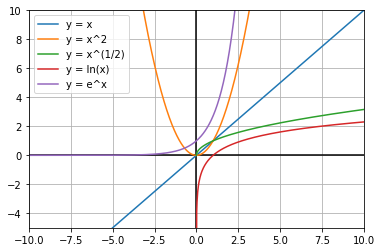

In [11]:
plt.grid()
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlim([-10, 10])
plt.ylim([-5, 10])
plt.plot(np.linspace(-10, 10, 1000), np.linspace(-10, 10, 1000), label="y = x")
plt.plot(np.linspace(-10, 10, 1000), np.linspace(-10, 10, 1000)**2, label="y = x^2")
plt.plot(np.linspace(0, 10, 500), np.linspace(0, 10, 500)**(1/2), label="y = x^(1/2)")
plt.plot(np.linspace(0.00001, 10, 500), np.log(np.linspace(0.00001, 10, 500)), label="y = ln(x)")
plt.plot(np.linspace(-10, 10, 1000), np.exp(np.linspace(-10, 10, 1000)), label="y = e^x")
plt.legend()
plt.show()

Of these basic functions I graphed, $\ln(x)$ and its inverse $e^x$ seem to have the most potential as a basis for creating an approximated Heavisde step function.

$y=e^x$ is already bounded by $y=0$. I can rewrite $y=e^x$ as $y=\frac{1}{e^{-x}}$ Looking at the behavior of this function, as the $x$ goes to infinity, the term $e^{-x}$ goes to $0$ and so the fraction $\frac{1}{e^{-x}}$ approaches infinity. However, If I add a $+1$ to the denominator of the fraction, then, the function will approach $\frac{1}{1}$ or just $1$ when $x\to\infty$.

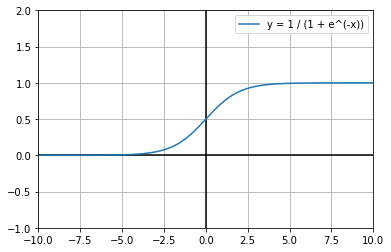

In [12]:
plt.grid()
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlim([-10, 10])
plt.ylim([-1, 2])
x = np.linspace(-10, 10, 1000)
y = 1 / (1 + math.e**(-1 * x))
plt.plot(np.linspace(-10, 10, 1000), y, label="y = 1 / (1 + e^(-x))")
plt.legend()
plt.show()

This is a type of **sigmoid function** known as a **logistic function**. If I instead use a really big number for the base of the exponent rather than $e$, I can get a pretty good approximation for the Heaviside step function:

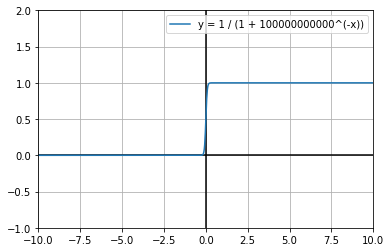

In [13]:
plt.grid()
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlim([-10, 10])
plt.ylim([-1, 2])
x = np.linspace(-10, 10, 1000)
y = 1 / (1 + 100000000000**(-1 * x))
plt.plot(np.linspace(-10, 10, 1000), y, label="y = 1 / (1 + 100000000000^(-x))")
plt.legend()
plt.show()

Even though visually it looks like having a large base value would make for a better approximation, it turns out that it doesn't actually really matter how steep the function is - the math works out (for the most part) regardless of steepness.

Remember that when I defined the problem, I stated that the data points must be linearly separable. If even one point is misclassified, I can expect the error between the true and the predicted to have a value that is at least $>0.5$. If that point ends up being classified correctly, the error between the true and the predicted should have a value $<0.5$. So total loss, which is the sum of all these smaller losses, should always be smaller when the points are classified correctly. Since I defined the problem to have linear separability, there must exist a solution that linearly separates the space and classifies all the points correctly. If a point manages to land right in the middle of the sigmoid at a value of $0.5$, it technically means that the computer doesn't know which class the point falls into. Of course, this scenerio can happen when you have an infinite number of input data points to cover the whole Cartesian space, which is unrealistic and woud never happen in a real-world scenario, or if the computer runs out of significant digits needed to classify the point correctly, which is an extreme that I don't really care about right now.

So given that it doesn't matter for the most part which variation of steepness I can use as my activation function, I'll choose to use:

$$\frac{1}{1+e^{-x}}$$

as my activation function and the one I use to calculate loss because taking the first-order derivative of this function is a lot nicer than if the base in this function was not $e$.

$$
\frac{d}{dx} \frac{1}{1+e^{-x}} = \frac{d}{dx} \frac{e^x}{1+e^x} = \frac{e^{-x}}{(1+e^{-x})^2} = \frac{e^x}{(1+e^x)^2}
$$

Great! So now I can use the logistic function as my activation function that transforms the output of my weighted sum. I can rewrite my $MSE$ loss as:

$$
MSE = \frac{1}{n} \sum\limits_{i = 1}^{n} \left(y_i - \frac{1}{1 + e^{-(b + w_1 x_{i,1} + w_2 x_{i,2})}}\right)^2
$$

and I can actually find the first-order partial derivatives of this function.

There is one more thing important thing to be aware of. My original approach was to use gradient descent to find the point of smallest loss, but minimizing a function using gradient descent only really works for convex functions. In least squares linear regression, my $MSE$ function took that of a parabolic shape and so there was always a guaranteed minimum point to work towards. This $MSE$ function has a sigmoidal "S" shape, and doesn't have a true minimum point. A gradient descent algorithm will keep going in the direction of $0$ for every iteration, but it will never converge onto a constant set of weights $w$ and bias $b$.

The problem I presented above is an important component of understanding why the **vanishing gradient** problem occurs and it is a problem that must be addressed when constructing deep neural networks (which I will get into a bit right now, but not too much). Luckily for me, my neural network only consists of one node so this problem is unlikely <span style="color:red">(or impossible? I'm not really sure as of now)</span> to happen.

I can either run the algorithm a set number of epochs as usual, or I can keep it running until the weights+bias values do not update anymore. If I keep iterating until the weights and bias no longer change with each iteration, then the only thing left to do is just test the performance of the perceptron. At this point, if the model classifies all the points in my dataset correctly, then everything is fine, I have a working model. If not, then I have experienced the vanishing gradient problem. This is because the magnitude of the gradient gets so small it has no effect on changing the weights+bias. This due to the nature of the sigmoid function and/or the fact computers that can't hold numbers that small in memory.

So let me go ahead and write out the gradient for by sigmoid based $MSE$ loss function and derive the weight+bias update formulas from the gradient:

$$
\nabla MSE =
\begin{bmatrix}
    MSE_{b} \\
    MSE_{w_1} \\
    MSE_{w_2}
\end{bmatrix}
=
\begin{bmatrix}
    \frac{1}{n} \sum\limits_{i = 1}^{n} -2\left(y_i - \frac{1}{1+e^{-(b + w_1 x_{i,1} + w_2 x_{i,2})}}\right)\left(\frac{e^{-(b + w_1 x_{i,1} + w_2 x_{i,2})}}{(1+e^{-(b + w_1 x_{i,1} + w_2 x_{i,2})})^2}\right) \\
    \frac{1}{n} \sum\limits_{i = 1}^{n} -2 x_{i,1} \left(y_i - \frac{1}{1+e^{-(b + w_1 x_{i,1} + w_2 x_{i,2})}}\right)\left(\frac{e^{-(b + w_1 x_{i,1} + w_2 x_{i,2})}}{(1+e^{-(b + w_1 x_{i,1} + w_2 x_{i,2})})^2}\right) \\
    \frac{1}{n} \sum\limits_{i = 1}^{n} -2 x_{i,2} \left(y_i - \frac{1}{1+e^{-(b + w_1 x_{i,1} + w_2 x_{i,2})}}\right)\left(\frac{e^{-(b + w_1 x_{i,1} + w_2 x_{i,2})}}{(1+e^{-(b + w_1 x_{i,1} + w_2 x_{i,2})})^2}\right)
\end{bmatrix}
$$
$$
b_{n+1} = b_n - \eta MSE_{b}(b_n, w_{1\, n}, w_{2\, n}) = b_n - \eta\left(\frac{1}{m} \sum\limits_{i = 1}^{m} -2\left(y_i - \frac{1}{1+e^{-(b_n + w_{1\, n} x_{i,1} + w_{2\, n} x_{i,2})}}\right)\left(\frac{e^{-(b_n + w_{1\, n} x_{i,1} + w_{2\, n} x_{i,2})}}{(1+e^{-(b_n + w_{1\, n} x_{i,1} + w_{2\, n} x_{i,2})})^2}\right)\right) \\
w_{1\, n+1} = w_{1\, n} - \eta MSE_{w_1}(b_n, w_{1\, n}, w_{2\, n}) = w_{1\, n} - \eta\left(\frac{1}{m} \sum\limits_{i = 1}^{m} -2 x_{i,1} \left(y_i - \frac{1}{1+e^{-(b_n + w_{1\, n} x_{i,1} + w_{2\, n} x_{i,2})}}\right)\left(\frac{e^{-(b_n + w_{1\, n} x_{i,1} + w_{2\, n} x_{i,2})}}{(1+e^{-(b_n + w_{1\, n} x_{i,1} + w_{2\, n} x_{i,2})})^2}\right)\right) \\
w_{2\, n+1} = w_{2\, n} - \eta MSE_{w_2}(b_n, w_{1\, n}, w_{2\, n}) = w_{2\, n} - \eta\left(\frac{1}{m} \sum\limits_{i = 1}^{m} -2 x_{i,2} \left(y_i - \frac{1}{1+e^{-(b_n + w_{1\, n} x_{i,1} + w_{2\, n} x_{i,2})}}\right)\left(\frac{e^{-(b_n + w_{1\, n} x_{i,1} + w_{2\, n} x_{i,2})}}{(1+e^{-(b_n + w_{1\, n} x_{i,1} + w_{2\, n} x_{i,2})})^2}\right)\right)
$$

Like before, set $m=1$, use predicted value $\hat y_i$ in the formulas, and let $\eta$ "absorb" the factor of $2$:

$$
b_{n+1} = b_n + \eta (y_i - \hat y_i)\left(\frac{{\hat y_i}^2}{e^{b_n + w_{1\, n} x_{i,1} + w_{2\, n} x_{i,2}}}\right) \\
w_{1\, n+1} = w_{1\, n} + \eta (y_i - \hat y_i)\left(\frac{{\hat y_i}^2}{e^{b_n + w_{1\, n} x_{i,1} + w_{2\, n} x_{i,2}}}\right)x_{i,1} \\
w_{2\, n+1} = w_{2\, n} + \eta (y_i - \hat y_i)\left(\frac{{\hat y_i}^2}{e^{b_n + w_{1\, n} x_{i,1} + w_{2\, n} x_{i,2}}}\right)x_{i,2}
$$

Like before, now I have everything needed to code out the perceptron. Once again, the perceptron algorithm in words is:
1. Initialize the weights and bias to zero (or with random values, it doesn't really matter)
2. Set the number of epochs
3. Iterate through each epoch
    1. For each epoch, randomly shuffle the order of data points in the dataset
    2. Iterate through each point in the dataset
        1. For each point, feed the $x_i$ value into the perceptron
        3. Update the weights and the bias based on the values calculated from the gradient of the loss function

In [14]:
lr = 0.001

class Perceptron():
    def __init__(self, input_dataset, classifications):
        self.dataset = input_dataset.copy()
        self.true_labels = classifications.copy()
        self.num_features = len(input_dataset[0])
        self.weights = [0] * self.num_features
        self.bias = 0
        self.activation_func = lambda x: 1 / (1 + math.e**(-1 * x))
    
    def shuffle_dataset(self):
        zipped_dataset = list(zip(self.dataset, self.true_labels))
        random.shuffle(zipped_dataset)
        self.dataset, self.true_labels = zip(*zipped_dataset)
    
    def process_one_point(self, data_point, label):
        x = data_point
        y = label
        weighted_sum = sum([w_d * x_d for w_d, x_d in zip(self.weights, x)]) + self.bias
        return x, y, self.activation_func(weighted_sum)
    
    def update_weights_bias(self, lr, x, y, y_hat):
        weighted_sum = sum([w_d * x_d for w_d, x_d in zip(self.weights, x)]) + self.bias
        self.weights = [w_d + lr * (y - y_hat) * (y_hat**2 / math.e**(weighted_sum)) * x_d for w_d, x_d in zip(self.weights, x)]
        self.bias += lr * (y - y_hat) * (y_hat**2 / math.e**(weighted_sum))
    
    def process_dataset(self, lr):
        self.shuffle_dataset()
        for i in range(0, len(self.dataset)):
            x, y, y_hat = self.process_one_point(self.dataset[i], self.true_labels[i])
            self.update_weights_bias(lr, x, y, y_hat)
    
    def get_current_true_loss(self):
        weighted_sums = [sum([w_d * x_d for w_d, x_d in zip(p.weights, s)]) + self.bias for s in self.dataset]
        pred_labels = [1 if ws > 0 else 0 for ws in weighted_sums]
        loss = sum([(t - p)**2 for t, p in zip(self.true_labels, pred_labels)])
        return loss
    
    def get_current_approximated_loss(self):
        weighted_sums = [sum([w_d * x_d for w_d, x_d in zip(p.weights, s)]) + self.bias for s in self.dataset]
        pred_labels = [1 / (1 + math.e**(-1 * ws)) for ws in weighted_sums]
        loss = sum([(t - p)**2 for t, p in zip(self.true_labels, pred_labels)])
        return loss

Train the perceptron classifier and graph the result:

In [15]:
p = Perceptron(samples, true_classifications)
loss_vals_perceptron_from_scratch = []
for epoch in range(0, 100000):
    p.process_dataset(lr)
    loss_vals_perceptron_from_scratch.append(p.get_current_true_loss())

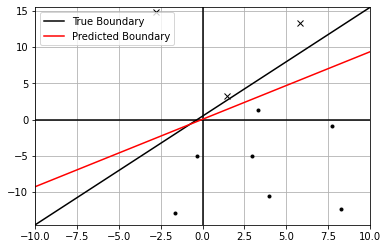

In [16]:
predicted_boundary_function = lambda x1: (-1 * p.weights[0] / p.weights[1]) * x1 - p.bias / p.weights[1]

plt.grid()
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlim([X1_LOWER_BOUND, X1_UPPER_BOUND])
plt.ylim([X2_LOWER_BOUND, X2_UPPER_BOUND])
plt.axline(
    (X1_LOWER_BOUND, TRUE_BOUNDARY_FUNCTION(X1_LOWER_BOUND)),
    (X1_UPPER_BOUND, TRUE_BOUNDARY_FUNCTION(X1_UPPER_BOUND)),
    color='black',
    label='True Boundary'
)
plt.axline(
    (X1_LOWER_BOUND, predicted_boundary_function(X1_LOWER_BOUND)),
    (X1_UPPER_BOUND, predicted_boundary_function(X1_UPPER_BOUND)),
    color='red',
    label='Predicted Boundary'
)
for i in range(0, NUM_SAMPLES):
    plt.plot(samples[i][0], samples[i][1], color="black", marker="." if true_classifications[i] == 0 else "x")
plt.legend()
plt.show()

Let me look at the graph of the total loss per epoch as well:

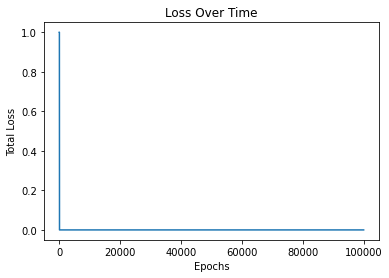

In [17]:
plt.title("Loss Over Time")
plt.xlabel("Epochs")
plt.ylabel("Total Loss")
plt.plot(loss_vals_perceptron_from_scratch)
plt.show()

I can see that the predicted boundary cleanly separates the data into two classes. However, it is unlikely that the equation for the predicted boundary will be equivalent to that of the true boundary. One way I can try to get a better estimate of the true boundary is to collect more data points. While that might help a little, there are still an infinite amount of lines that can be drawn to linearly separate the data. The perceptron algorithm will not always give the same boundary line if the input data is processed in a different order. While the perceptron is good at finding a line that divides linearly seperable data, other techniques might be useful, like **support vector machines**, in order to find boundaries that might be better generalizations for unobserved data.

### PyTorch Implementation

Here is my PyTorch implementation of the binary classifier perceptron.

In [18]:
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.ws = nn.Linear(2, 1, bias=True)
        self.af = nn.Sigmoid()
    
    def forward(self, x):
        weighted_sum = self.ws(x)
        return self.af(weighted_sum)

p = Perceptron()

samples_tensor = torch.tensor(samples)
true_classifications_tensor = torch.FloatTensor(true_classifications).unsqueeze(dim=1)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(p.parameters(), lr=0.001)

loss_pytorch_perceptron = []

for epoch in range(0, 100000):
    y_hat = p(samples_tensor)

    loss = criterion(true_classifications_tensor, y_hat)
    loss_pytorch_perceptron.append(loss.detach())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Graph the result of the trained perceptron binary classifier:

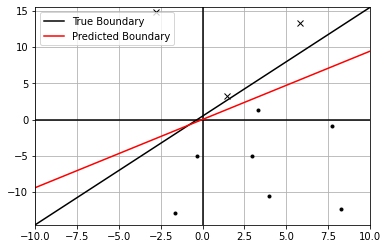

In [19]:
predicted_boundary_function = lambda x1: (-1 * p.ws.weight[0][0].item() / p.ws.weight[0][1].item()) * x1 - p.ws.bias.item() / p.ws.weight[0][1].item()

plt.grid()
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlim([X1_LOWER_BOUND, X1_UPPER_BOUND])
plt.ylim([X2_LOWER_BOUND, X2_UPPER_BOUND])
plt.axline(
    (X1_LOWER_BOUND, TRUE_BOUNDARY_FUNCTION(X1_LOWER_BOUND)),
    (X1_UPPER_BOUND, TRUE_BOUNDARY_FUNCTION(X1_UPPER_BOUND)),
    color='black',
    label='True Boundary'
)
plt.axline(
    (X1_LOWER_BOUND, predicted_boundary_function(X1_LOWER_BOUND)),
    (X1_UPPER_BOUND, predicted_boundary_function(X1_UPPER_BOUND)),
    color='red',
    label='Predicted Boundary'
)
for i in range(0, NUM_SAMPLES):
    plt.plot(samples[i][0], samples[i][1], color="black", marker="." if true_classifications[i] == 0 else "x")
plt.legend()
plt.show()

Let me look at the graph of the total loss per epoch as well:

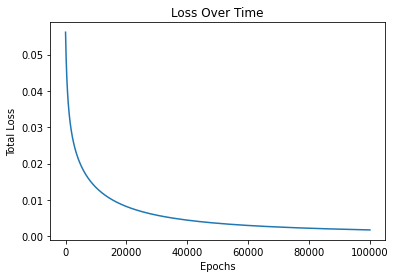

In [20]:
plt.title("Loss Over Time")
plt.xlabel("Epochs")
plt.ylabel("Total Loss")
plt.plot(loss_pytorch_perceptron)
plt.show()

# Appendix

#### Links

Some possibly helpful links for understanding the perceptron. I looked at all of them but some were more helpful than others.

https://natureofcode.com/book/chapter-10-neural-networks/  
https://en.wikipedia.org/wiki/Perceptron  
https://www.youtube.com/watch?v=4Gac5I64LM4&ab_channel=ritvikmath  
http://web.mit.edu/6.S097/www/resources/L01.pdf  
https://stats.stackexchange.com/questions/200445/machine-learning-intuition-behind-perceptron-learning-algorithm  
https://stats.stackexchange.com/questions/387695/derivation-of-perceptron-weight-update-formula  
https://stats.stackexchange.com/questions/411212/how-are-the-weights-updated-in-the-perceptron-learning-rule  
https://datascience.stackexchange.com/questions/36450/what-is-the-difference-between-gradient-descent-and-stochastic-gradient-descent  
https://towardsdatascience.com/the-hitchhikers-guide-to-optimization-in-machine-learning-edcf5a104210  
https://www.reddit.com/r/pytorch/comments/mvpj9k/how_to_change_pytorch_sigmoid_function_to_be_more/  
https://stackoverflow.com/questions/67203664/how-to-change-pytorch-sigmoid-function-to-be-steeper

#### Versions Used

python 3.8.9  
jupyterlab 3.3.4  
matplotlib 3.5.1  
numpy 1.21.5  
torch 1.11.0